In [10]:
import pickle
import pprint

import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter()

In [5]:
with open(f"../data/df.pkl", 'rb') as in_df:
    df = pickle.load(in_df)
with open(f"../data/components.pkl", 'rb') as in_components:
    components = pickle.load(in_components)

In [11]:
display(df)
pp.pprint(components)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.2690,https://api.spotify.com/v1/audio-analysis/5Y6K...,0.759,193720.0,0.550,5Y6KVqFrsZDIkKBC6K7QQ4,0.000002,2.0,0.1210,-8.018,1.0,0.0560,97.009,4.0,https://api.spotify.com/v1/tracks/5Y6KVqFrsZDI...,audio_features,spotify:track:5Y6KVqFrsZDIkKBC6K7QQ4,0.6260
1,0.2140,https://api.spotify.com/v1/audio-analysis/5FNS...,0.692,178800.0,0.443,5FNS5Vj69AhRGJWjhrAd01,0.000000,1.0,0.0600,-5.671,1.0,0.0386,127.899,4.0,https://api.spotify.com/v1/tracks/5FNS5Vj69AhR...,audio_features,spotify:track:5FNS5Vj69AhRGJWjhrAd01,0.3630
2,0.4430,https://api.spotify.com/v1/audio-analysis/2KKB...,0.704,191008.0,0.599,2KKBlK4IZUdjlJ7F0WGzU6,0.000000,6.0,0.1470,-7.349,1.0,0.0536,128.023,4.0,https://api.spotify.com/v1/tracks/2KKBlK4IZUdj...,audio_features,spotify:track:2KKBlK4IZUdjlJ7F0WGzU6,0.7890
3,0.0875,https://api.spotify.com/v1/audio-analysis/1Ylu...,0.683,213507.0,0.420,1YlulsUKDduOmC7WxvXYPW,0.000000,5.0,0.2250,-6.510,1.0,0.0542,128.621,4.0,https://api.spotify.com/v1/tracks/1YlulsUKDduO...,audio_features,spotify:track:1YlulsUKDduOmC7WxvXYPW,0.4690
4,0.7770,https://api.spotify.com/v1/audio-analysis/0ri0...,0.813,170345.0,0.415,0ri0Han4IRJhzvERHOZTMr,0.000000,0.0,0.1310,-5.926,1.0,0.0349,91.921,4.0,https://api.spotify.com/v1/tracks/0ri0Han4IRJh...,audio_features,spotify:track:0ri0Han4IRJhzvERHOZTMr,0.6670
5,0.2970,https://api.spotify.com/v1/audio-analysis/4lsH...,0.774,201587.0,0.376,4lsHZ92XCFOQfzJFBTluk8,0.000000,5.0,0.1650,-9.372,1.0,0.2080,122.089,4.0,https://api.spotify.com/v1/tracks/4lsHZ92XCFOQ...,audio_features,spotify:track:4lsHZ92XCFOQfzJFBTluk8,0.3910
6,0.0803,https://api.spotify.com/v1/audio-analysis/4Cxm...,0.831,180053.0,0.452,4CxmynXhw78QefruycvxG8,0.000000,5.0,0.3590,-5.111,0.0,0.0470,93.040,4.0,https://api.spotify.com/v1/tracks/4CxmynXhw78Q...,audio_features,spotify:track:4CxmynXhw78QefruycvxG8,0.5340
7,0.3130,https://api.spotify.com/v1/audio-analysis/2NPQ...,0.710,178253.0,0.728,2NPQbiRn9f5JWlCgNLNZJn,0.000017,0.0,0.1860,-7.581,1.0,0.2750,104.999,4.0,https://api.spotify.com/v1/tracks/2NPQbiRn9f5J...,audio_features,spotify:track:2NPQbiRn9f5JWlCgNLNZJn,0.4590
8,0.8690,https://api.spotify.com/v1/audio-analysis/6GMa...,0.598,183227.0,0.357,6GMaQmdpwGolGyuW6ZJ9X9,0.095700,3.0,0.2700,-12.104,1.0,0.0492,75.017,4.0,https://api.spotify.com/v1/tracks/6GMaQmdpwGol...,audio_features,spotify:track:6GMaQmdpwGolGyuW6ZJ9X9,0.1680
9,0.0858,https://api.spotify.com/v1/audio-analysis/07ZQ...,0.744,168987.0,0.556,07ZQLYn9x4x3L3vxStc1zr,0.000000,8.0,0.1000,-6.970,1.0,0.0375,105.006,4.0,https://api.spotify.com/v1/tracks/07ZQLYn9x4x3...,audio_features,spotify:track:07ZQLYn9x4x3L3vxStc1zr,0.5050


array([[-3.90629418e-03, -2.52720848e-03,  1.50217920e-03,
        -1.61300317e-03, -1.26362930e-03,  2.75437736e-02,
         2.10622517e-03, -4.33218642e-05,  9.99603707e-01,
        -1.82899548e-04, -1.09366240e-03],
       [-6.29371561e-02,  1.55851156e-02,  3.60841825e-02,
        -3.09118394e-02, -2.13828170e-03,  9.94800967e-01,
        -1.88276508e-02, -7.55650612e-03, -2.76658265e-02,
        -4.55519464e-02,  2.55521497e-02],
       [-3.41948274e-01,  1.55974100e-01, -1.54779933e-02,
        -7.11570371e-02,  7.08809274e-02, -4.25364233e-02,
        -9.04582753e-01,  1.98008907e-02,  2.30990400e-03,
         8.08391987e-02,  1.46303685e-01],
       [-7.38365274e-01,  3.33760211e-02,  6.71207605e-02,
        -1.01625040e-01, -2.42130052e-02, -7.74417826e-02,
         2.92697735e-01,  7.59363919e-02, -1.37439193e-03,
        -5.17210364e-01,  2.70812978e-01]])


In [17]:
pca_df = df[['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
pca = decomposition.PCA(n_components=6)
pca.fit(pca_df)



PCA(n_components=6)

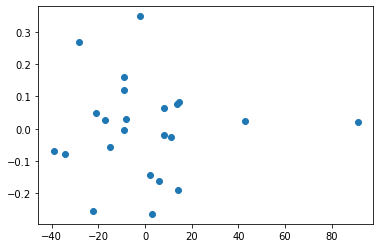

In [23]:
pca_transform = pca.fit_transform(pca_df)
first_dim = pca_transform[:,0]
last_dim = pca_transform[:,-1]
plt.scatter(first_dim, last_dim)


In [ ]:
def generate_new_songs:
    
    
    